# AIT500 - Course Project Checkpoint 3 - Part 1 (26-Mar-2024)

## Collect Data, Clean Data, Model Data
In order to create an ML model to predict arrows that your robot encounters, we first need to collect data.  Recall this is the first step of the data science process!

We will use crowd-sourcing to help build a large set of arrow images to help train our model.

This notebook walks you through the process to capture images of direction arrows from the camera on Raspberry Pi to provide you experience with:
1. using the `picamera2` module
2. working with `create_still_configuration()` to:
    1. capture and save image as `jpg` files
    2. configuring the camera to capture `1280 x 1280` images
    3. use `XRGB8888` format

## Data Collection Steps
1. Download this notebook onto your Raspberry Pi
1. Understand the code of each notebook cell and be able to explain its function
1. Prepare your own up, left, right arrows:
2. Run the notebook cells to capture and process each arrow image
   1. You must create 5 unique images for **uparrow**
   2. You must create 5 unique images for **leftarrow**
   3. You must create 5 unique images for **rightarrow**
1. Rename your images to match this naming convention (`##` --> 01, 02, 03, etc):
   1. `uparrow_##_yourname.jpg`
   2. `leftarrow_##_yourname.jpg`
   3. `rightarrow_##_yourname.jpg`
1. Copy the _raw files to your folder in the [Project Image Google Drive](https://drive.google.com/drive/folders/1Lkq2KDIvLO5S22uyGAiP7VnwFBIIykW4) (ex: `YourName\raw`)
2. Copy the _cleaned files to your folder in the [Project Image Google Drive](https://drive.google.com/drive/folders/1Lkq2KDIvLO5S22uyGAiP7VnwFBIIykW4) (ex: `YourName\clean`)
3. Review [example directory and file structure here](https://drive.google.com/drive/folders/1vh6ppkQq2D9YG6ckqZTr0NOCiP13TMO1)

In [4]:
import time
import threading

from datetime import datetime as dt

# for camera
from picamera2 import Picamera2, Preview

# for image manipulation and visualization
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

# Camera Setup

In [16]:
def camera_setup():    
    picam2 = Picamera2()
    # camera_config = picam2.create_preview_configuration()
    camera_config = picam2.create_still_configuration({'size': (1280,1280), 'format':'XRGB8888'}) # still image capture: 1280x1024 image size
    picam2.configure(camera_config)
    # picam2.start_preview(Preview.QTGL)
    # picam2.start_preview(Preview.DRM)
    return picam2, camera_config

def camera_shutdown(picam2):
    if picam2==None:
        return
    else:
        picam2.close()
        picam2.stop()
        print("Camera closed and stopped")
    
def capture_image(picam2=None, image_filename=None):
    # print(f"capture_image(): {threading.current_thread().name} with {image_filename}")
    if picam2==None or image_filename==None:
        return
    else:
        picam2.start()
        time.sleep(2)
        picam2.capture_file(image_filename, format='jpeg')
        
        picam2.stop()
    print(f"capture_image(): {threading.current_thread().name} with {image_filename} - Done")

def display_image(file_path):
    image = plt.imread(file_path)
    print(file_path)
    _ = plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and labels
    plt.show()
    return image

# Capture Raw Images

capture one image and save to filename specified by image stage

- `image_stage` can be one of: `raw`, `cleaned`, `final`
- `time` is the time image was captured in this working session

In [83]:
image_template_filename = "rightarrow_00_dora_{time}_{type}.jpg"

[6:23:54.530645298] [10646]  INFO Camera camera_manager.cpp:297 libcamera v0.0.5+83-bde9b04f
[6:23:54.693801031] [10710]  INFO RPI vc4.cpp:437 Registered camera /base/soc/i2c0mux/i2c@1/imx708@1a to Unicam device /dev/media3 and ISP device /dev/media0
[6:23:54.693920250] [10710]  INFO RPI pipeline_base.cpp:1101 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[6:23:54.729075940] [10646]  INFO Camera camera.cpp:1033 configuring streams: (0) 1280x1280-XRGB8888 (1) 2304x1296-SBGGR10_CSI2P
[6:23:54.729952871] [10710]  INFO RPI vc4.cpp:565 Sensor: /base/soc/i2c0mux/i2c@1/imx708@1a - Selected sensor format: 2304x1296-SBGGR10_1X10 - Selected unicam format: 2304x1296-pBAA


capture_image(): MainThread with rightarrow_00_dora_20231127-19h42m43s_raw.jpg - Done
Camera closed and stopped
rightarrow_00_dora_20231127-19h42m43s_raw.jpg


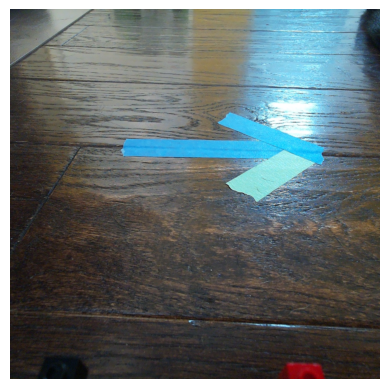

Image shape: (1280, 1280, 3)


In [84]:
image_capture_time = dt.now().strftime("%Y%m%d-%Hh%Mm%Ss") 
image_stage = 'raw'
try:
    # initialize camera, pause to allow init to finish
    picam2, camera_config = camera_setup()
    time.sleep(1)

    # include timestamp in captured file
    raw_image_filename = image_template_filename.format(time=image_capture_time, type=image_stage)
    
    capture_image(picam2, raw_image_filename)

except Exception as e:
    # handle exceptions 
    print("Exception!")
    print(e.__traceback__)
    print(e.with_traceback())

finally:
    camera_shutdown(picam2)

### display captured image ###
image = display_image(raw_image_filename)
print(f"Image shape: {image.shape}")


# Resize Image to 224x224

This section shows code to resize the square crop to 224x224 for compatibility with popular open-source image models



Image shape: (224, 224)
rightarrow_00_dora_20231127-19h42m43s_cleaned.jpg


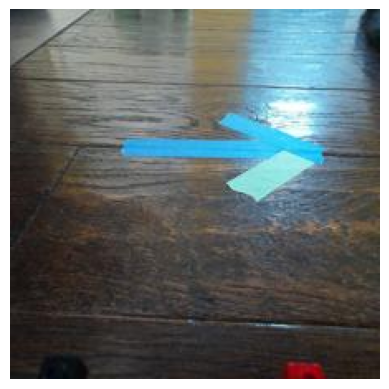

In [87]:
image_stage = 'cleaned'
cleaned_image_filename = image_template_filename.format(time=image_capture_time, type=image_stage)

image_dimension = (224,224)
image = Image.open(raw_image_filename)
resized_image = image.resize(image_dimension)
resized_image.save(cleaned_image_filename)

print(f"Image shape: {resized_image.size}")

### display resized image ###
cleaned_image = display_image(cleaned_image_filename)

# Crop Image to a Square

1. use a large square to crop the arrow with surroundings (2048x2028)
2. resize to 224x224
3. save cropped and resized image as `leftarrow_01_yasar_cleaned.jpg`

![](leftarrow_01_yasar.jpg)


In [ ]:
image_filename = 'leftarrow_01_yasar.jpg'
cleaned_image_filename = 'leftarrow_01_yasar_cleaned.jpg'

image = Image.open(image_filename)
# adjust upper_left_x, upper_left_y so the arrow fits into cropping square
upper_left_x = 1100
upper_left_y = 120
image_dimension = 2048 # use 2048x2048 crop box

crop_box = (upper_left_x,upper_left_y, upper_left_x+image_dimension,upper_left_y+image_dimension)

cropped_image = image.crop(crop_box)
# cropped_image.show() # this opens separate window

plt.axis('off')  # Turn off axis numbers and labels
print(cropped_image.size)
_ = plt.imshow(cropped_image)

(2048, 2048)


Image shape: (224, 224)
leftarrow_01_yasar_cleaned.jpg


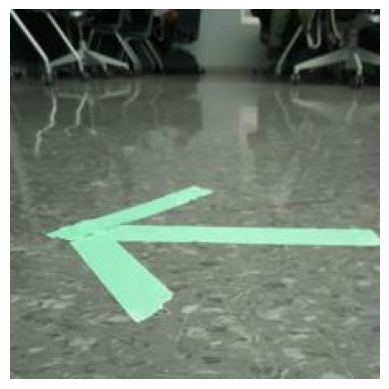

In [24]:
# resize to 224x224 and save
image_dimension = (224,224)
resized_image = cropped_image.resize(image_dimension)
resized_image.save(cleaned_image_filename)

print(f"Image shape: {resized_image.size}")

### display resized image ###
cleaned_image = display_image(cleaned_image_filename)